# Projeto final

Este notebook é um projeto guiado com auxílio do professor, no curso Python-Basics da Let's Code/ADA oferecido pelo Santander no processo seletivo para o curso de Data Science oferecido. <br>
O objetivo é analisar os dados da Covid-19. Especialmente os dados confirmados, as mortes, os casos recuperados, casos ativos respectivo as datas registradas. <br>


## Importação biblioteca

In [425]:
import requests as r

## Importação dados

In [426]:
url = 'http://api.covid19api.com/dayone/country/brazil'
resp = r.get(url)

In [427]:
resp.status_code

200

- Conseguimos importar a API. 
- A ideia é guardar esses dados em uma variável, que foi chamada de *raw_data*

In [428]:
raw_data = resp.json()

In [429]:
raw_data[0]

{'ID': '63aa488e-b4a2-4fcd-ae15-07c1ff219903',
 'Country': 'Brazil',
 'CountryCode': 'BR',
 'Province': '',
 'City': '',
 'CityCode': '',
 'Lat': '-14.24',
 'Lon': '-51.93',
 'Confirmed': 1,
 'Deaths': 0,
 'Recovered': 0,
 'Active': 1,
 'Date': '2020-02-26T00:00:00Z'}

- Ao chamar o *raw_data* vemos que o retorno é um Json que trazem informações a respeido do Covid-19. 
- Vamos utilizar aqui dos dados *'Confirmed', 'Deaths', 'Recovered', 'Active' por 'Date'*.
- Para filtrar os dados que queremos utilizar, fazemos abaixo uma variável para armazenar apenas o que queremos armazenar (*'Confirmed', 'Deaths', 'Recovered', 'Active' por 'Date'*)

In [430]:
final_data = []
for obs in raw_data:
    final_data.append([obs['Confirmed'], obs['Deaths'], obs['Recovered'], obs['Active'], obs['Date']])


- Deu certo. Se nossa intenção é guardar esses dados em um arquivo CSV, é necessário inserirmos o *header*.Abaixo

In [431]:
final_data.insert(0, ['confimados', 'obitos', 'recuperados', 'ativos', 'data'])


- O formato de data que a API trás é diferente do que usamos. Esses elementos T00:00:00Z na parte final pode ser retirado. 
- Para isso, abaixo criamos variáveis para armazenar constantes para **facilitar** nosso tratamento e referenciamento dos dados nas posições determinadas. Que servirá também para outras situações

In [432]:
CONFIRMADOS = 0
OBITOS = 1
RECUPERADOS = 2
ATIVOS = 3
DATA = 4

- O que queremos é alterar apenas uma das *obs*. No caso, o DATA. 
- Abaixo o *for* percorrerá os rows do DATA e sobrescrever nesse dado apenas o dado no intervalo de 0 à 9 ( [:10] ). O que dá justamente o 'ano', 'mes' e 'dia'. 

In [433]:
for i in range(1, len(final_data)):
    final_data[i][DATA] = final_data[i][DATA][:10]

In [434]:
var = final_data[1][4]
type(var)

str

- O resuldado é um valor que representa a data. Mas não é a data, mas uma string que representa a data. 
- Abaixo, como transforma essa string  em uma data mesmo, para assim podermos fazer algumas operações com esses números.

## Transformação data 

In [435]:
import datetime as dt

In [436]:
print(dt.time(12, 6, 21, 7), 'Hora:minuto:segundo.microsegundo')
print('............')
print(dt.date(2020, 4, 25), 'Ano-mês-dia')
print('............')
print(dt.datetime(2020, 4, 25, 12, 6, 21, 7), 'Ano-mês-dia Hora:minuto:segundo.microsegundo')

12:06:21.000007 Hora:minuto:segundo.microsegundo
............
2020-04-25 Ano-mês-dia
............
2020-04-25 12:06:21.000007 Ano-mês-dia Hora:minuto:segundo.microsegundo


- Vantagens de transformar o dado em data é que se pode fazer algumas operações se adicionar ou subtrair datas. 

### Operações Data

In [437]:
natal = dt.date(2020, 12, 25)
reveillon = dt.date(2021, 1, 1)

print(reveillon - natal)
print((reveillon - natal).days)
print((reveillon - natal).seconds)
print((reveillon - natal).microseconds)

7 days, 0:00:00
7
0
0


### Escrevendo novos dados a partir de dados

In [438]:
import csv

In [439]:
with open('brasil_covid.csv', 'w') as file:
    writer = csv.writer(file)
    writer.writerows(final_data)

In [440]:
# esse código não pode rodar duas vezes pois da error. 
for i in range(1, len(final_data)):
    final_data[i][DATA] = dt.datetime.strptime(final_data[i][DATA], '%Y-%m-%d')

## QuickChart

Trata-se de um jeito rápido do python fazer um gráfico sem precisar importar bibliotecas.
<br>
**Ver Documentação**
__[Documentação QuickChart](https://quickchart.io/documentation/)__

### Funções Helpers

Para gerar o gráfico é necessário criar umas funções auxiliares que vai ajudar na construção do gráfico

#### Função: define estutura dos dados

In [441]:
def get_datasets(y, labels):
    if type(y[0]) == list:
        datasets = []
        for i in range(len(y)):
            datasets.append({
                'label': labels[i],
                'data': y[i]
                })
        return datasets
    else:
        return[
            {
                'label': labels[0],
                'data': y
                }
            ]

#### Função: define título do gráfico

In [442]:
def set_title(title = ''):
    if title != '':
        display = 'true'
    else:
        display = 'false'
    return{
        'title': title,
        'display': display
    }

#### Função: cria dicionário que representa o gráfico

In [443]:
def create_chart(x, y, labels, kind = 'bar', title = ''):
    
    datasets = get_datasets(y, labels)
    options = set_title(title)
    
    chart = {
        'type': kind,
        'data': {
            'labels': x,
            'datasets': datasets
        },
        'options': options
    }
    
    return chart

#### Função: faz a requisição na API

In [444]:
def get_api_chart(chart):
    url_base = 'http://quickchart.io/chart'
    resp = r.get(f'{url_base}?c={str(chart)}')
    return resp.content

#### Função: salva a imagem

In [445]:
def save_image(path, content):
    with open(path, 'wb') as image:
        image.write(content)

#### Função: mostra a imagem dentro do notebook

In [446]:
from PIL import Image
from IPython.display import display

In [447]:
def display_image(path):
    img_pil = Image.open(path)
    display(img_pil)

### Criando gráfico

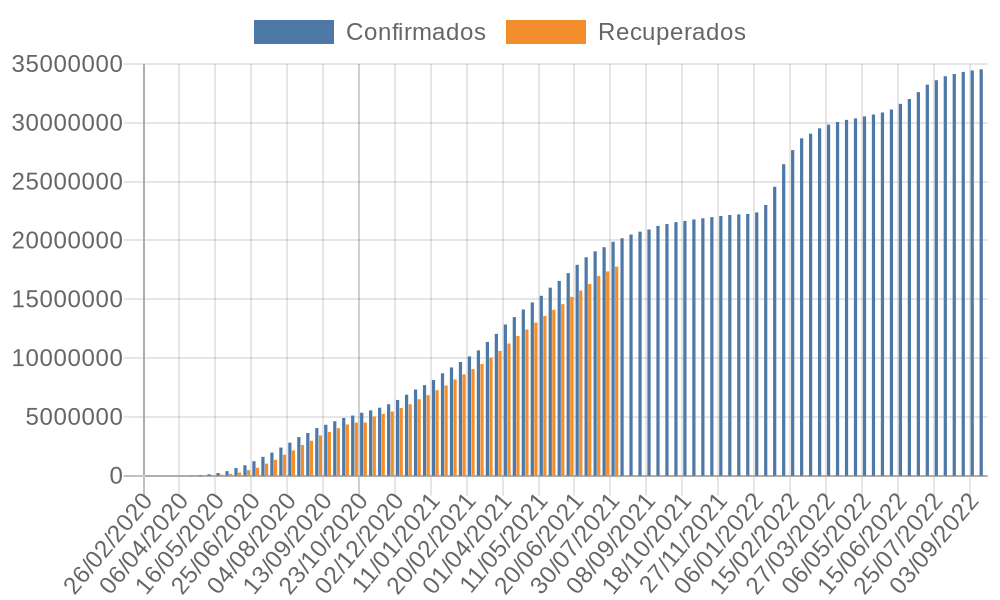

In [448]:
y_data_1 = []
for obs in final_data[1::10]:
    y_data_1.append(obs[CONFIRMADOS])
    
y_data_2 = []
for obs in final_data[1::10]:
    y_data_2.append(obs[RECUPERADOS])

labels = ['Confirmados', 'Recuperados']

x = []
for obs in final_data[1::10]:
    x.append(obs[DATA].strftime('%d/%m/%Y'))
    #x += [obs[DATA].strftime('%d/%m/%Y')]
    
chart = create_chart(x, [y_data_1, y_data_2], labels, title = 'Gráfico confirmados vs Recuperados')
chart_content = get_api_chart(chart)
save_image('meu-primeiro-grafico.png', chart_content)
display_image('meu-primeiro-grafico.png')

### Cria QRCode

In [449]:
from urllib.parse import quote

In [450]:
def get_api_qrcode(link):
    text = quote(link) #parsing do link para url
    url_base = 'http://quickchart.io/qr'
    resp = r.get(f'{url_base}?text={text}')
    return resp.content

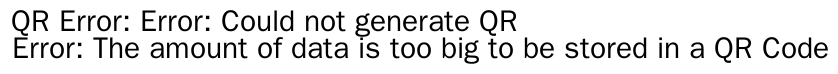

In [451]:
url_base = 'http://quickchart.io/chart'
link = f'{url_base}?c={str(chart)}'
save_image('qr-code.png', get_api_qrcode(link))
display_image('qr-code.png')